Ovaj skup sadrzi dve serije podataka o nivou prizemnog ozona. Jedna se odnosi na osmocasovni maksimum (eight-hour peak set – eighthr.data), a druga na jednocasovni maksimum (one-hour peak set – onehr.data). Podaci su prikupljani u periodu od 1998. do 2004. godine na podrucju Houston–Galveston–Brazoria u Teksasu, SAD.

Za potrebe ovog projekta trenutno se koristi jednocasovni skup podataka (one-hour peak set). Trenutno je veci fokus usmeren na analizu temperature i njen odnos sa drugim parametrima, posto u ovim podacima vrednost ozona je samo 1 ili 0 u zavisnosti da li prelazi neki threshold i pritom ima malo vrednosti gde je zapravo 1.

Import biblioteka

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



Import fajla i formatiranje podataka

In [4]:
file = 'ozone/onehr.data'
data = pd.read_csv(file, header=None)

# Definiši imena kolona prema .names fajlu
columns = [
    'Date',
    'WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23',
    'WSR_PK','WSR_AV',
    'T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23',
    'T_PK','T_AV',
    'T85','RH85','U85','V85','HT85',
    'T70','RH70','U70','V70','HT70',
    'T50','RH50','U50','V50','HT50',
    'KI','TT','SLP','SLP_','Precp','Class',
]

# Dodeli nazive
data.columns = columns

num_cols = data.columns.difference(['Date', 'Class'])
data[num_cols] = data[num_cols].apply(
    lambda s: pd.to_numeric(s, errors='coerce')
)





Prikaz podataka:

C:\Users\User\AppData\Local\Temp\ipykernel_3396\96490037.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


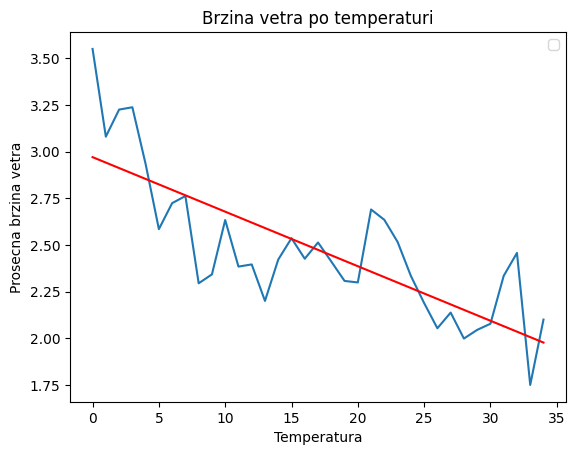

In [29]:
df = data[['T_AV', 'WSR_AV']].dropna()
df['T_bin'] = df['T_AV'].round().astype(int)

agg = df.groupby('T_bin')['WSR_AV'].mean().reset_index()

plt.plot(agg['T_bin'], agg['WSR_AV'])
m, b = np.polyfit(agg['T_bin'], agg['WSR_AV'], 1)
plt.plot(agg['T_bin'], m*agg['T_bin'] + b, color='red')

plt.xlabel('Temperatura')
plt.ylabel('Prosecna brzina vetra')
plt.title('Brzina vetra po temperaturi')
plt.legend()
plt.show()


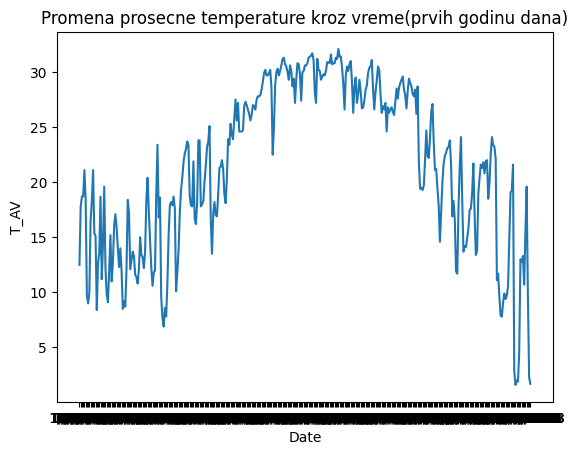

In [ ]:
sns.lineplot(data=data.head(365), x='Date', y='T_AV')
plt.title('Promena prosecne temperature kroz vreme (prvih godinu dana)')
plt.show()


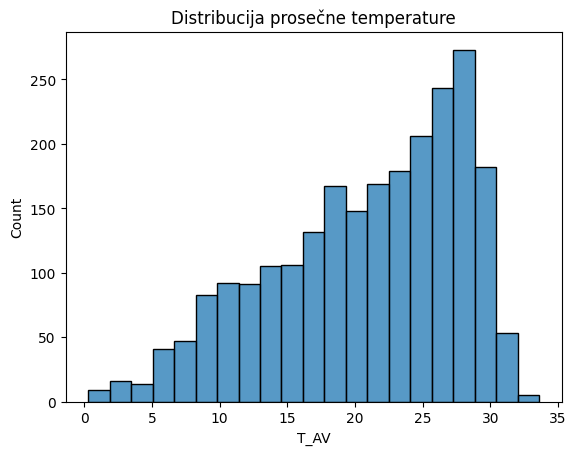

In [ ]:
sns.histplot(data['T_AV'])
plt.title('Distribucija prosecne temperature')
plt.show()


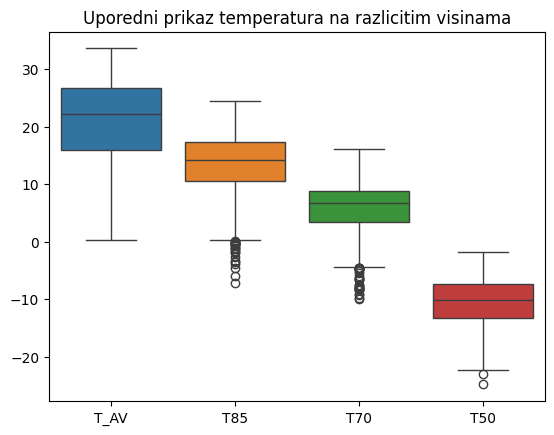

In [28]:
sns.boxplot(data=data[['T_AV', 'T85', 'T70', 'T50']])
plt.title('Uporedni prikaz temperatura na razlicitim visinama')
plt.show()


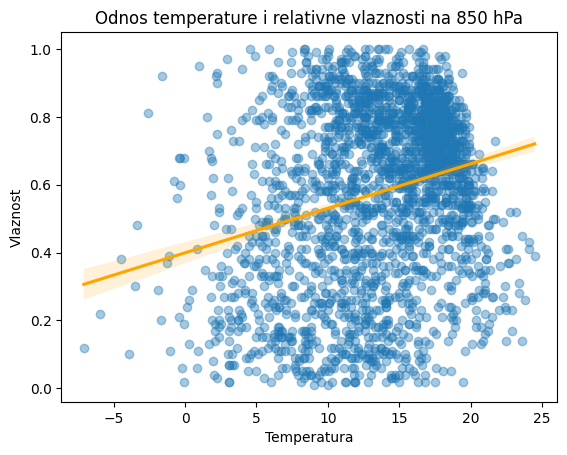

In [27]:
sns.regplot(data=data, x='T85', y='RH85', scatter_kws={'alpha':0.4}, line_kws={'color':'orange'})
plt.title('Odnos temperature i relativne vlaznosti na 850 hPa')
plt.xlabel('Temperatura')
plt.ylabel('Vlaznost')
plt.show()


Pogled koje su vrednosti NA, umesto njih stavljamo medianu, pa opet check -> vise nema NA vrednosti.

In [ ]:
print(data.isna().sum().to_string())
data = data.fillna(data.median(numeric_only=True))
print(data.isna().sum().to_string())


odbacujemo date i class posto nisu brojevni podaci, ostale spremamo za skaliranje

In [ ]:
from sklearn.preprocessing import StandardScaler

# Kolone koje skaliramo: sve osim Date i Class
feature_cols = data.columns.drop(["Date", "Class"])

feature_cols


Skalirani podaci

In [15]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(data[feature_cols])

data_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

# Po želji dodamo nazad Class da bude uz skale vrednosti
data_scaled["Class"] = data["Class"].values

data_scaled.head()



,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Class
0,-0.667611,0.205543,0.763114,0.527147,0.445105,0.529379,-0.101229,-0.303127,-0.569843,-0.472311,0.601133,1.914442,1.543542,1.699711,1.665240,1.139168,0.915115,0.487928,0.808653,0.545591,0.987187,1.129814,0.877980,0.776345,1.204006,0.912563,-2.007554,-1.811414,-1.753709,-1.706902,-1.665583,-1.703693,-1.727927,-1.732701,-1.672085,-1.436183,-1.090816,-0.858956,-0.800283,-0.782341,-0.800567,-0.837880,-0.884827,-0.924038,-0.847051,-0.811659,-0.803106,-0.790481,-0.724658,-0.624574,-0.949359,-1.245840,-1.445227,-1.856269,0.375525,-0.257181,2.232382,-2.182804,-0.401431,0.270175,-0.144929,0.678573,-1.320744,-0.620519,0.093787,-0.334139,-0.317611,-1.132855,-1.792524,3.228129,-1.582570,-0.282090,0.0
1,0.999280,1.376907,1.531717,1.055266,1.596205,1.524699,1.176882,0.702946,0.505597,0.484313,1.008876,1.147552,1.094022,0.888419,1.739895,1.448815,0.501186,0.058400,0.037954,0.633162,0.105360,0.340114,0.619409,0.944067,1.204006,1.256299,-0.544760,-0.466324,-0.377202,-0.341834,-0.266849,-0.203221,-0.213267,-0.311679,-0.434970,-0.474052,-0.429945,-0.395931,-0.402026,-0.378687,-0.336049,-0.382801,-0.526282,-0.663886,-0.656678,-0.646668,-0.636731,-0.609119,-0.544050,-0.445730,-0.471436,-0.463604,-0.964072,-1.303134,-0.555770,1.331334,1.746234,-2.156418,2.119199,0.434175,1.054144,0.543771,-1.057135,0.735674,-0.156056,0.432751,-0.188551,0.163823,-0.781050,2.158413,-1.582570,-0.282090,0.0
2,1.082625,1.042231,0.933914,0.527147,0.622197,0.891314,0.811708,0.611484,-0.300983,-0.298379,0.111840,0.764108,1.019102,1.109681,1.814549,1.681050,1.660186,1.261078,0.808653,0.370449,0.722639,1.744026,1.998455,2.453569,1.294206,1.370878,-0.323125,-0.261636,-0.217817,-0.169404,-0.138394,-0.118289,-0.116879,-0.219576,-0.369166,-0.500778,-0.470407,-0.300603,-0.319628,-0.350848,-0.378278,-0.368580,-0.454572,-0.562716,-0.583458,-0.526675,-0.409855,-0.291734,-0.197884,-0.117848,-0.500401,-0.330772,-0.964072,-0.078334,-0.270232,1.439604,1.023957,-1.338443,0.515162,-0.252769,0.573179,0.294906,-1.426187,1.228835,-0.314948,1.279171,-0.382141,0.354730,0.339772,1.380438,-1.149999,-0.282090,0.0
3,2.582826,1.878920,1.873318,2.023485,1.242020,1.434216,1.085589,0.428562,-0.121743,0.223416,0.274938,0.073907,-0.554219,-0.734164,-0.723700,0.442462,-0.326670,-0.457034,-0.561478,0.808303,1.780832,1.744026,2.343217,2.201986,0.482406,1.027142,-0.071938,-0.042328,0.014015,0.060502,0.118516,0.136508,0.103435,0.017262,-0.171755,-0.340423,-0.483894,-0.613825,-0.662953,-0.712745,-0.730186,-0.795216,-0.798776,-0.707245,-0.583458,-0.451679,-0.364480,-0.246394,-0.122631,-0.043330,-0.876946,-0.330772,-0.775794,1.225485,-0.540395,1.170622,0.412799,-0.784331,1.393563,-0.195524,1.189415,-0.005806,-1.663434,0.776771,-0.118799,1.384263,-0.575731,1.011746,1.287459,0.602463,-1.149999,1.297567,0.0
4,0.832591,0.456549,0.079911,-0.088992,-0.528903,-0.013523,-0.375111,-0.577511,-1.107563,-1.255004,-0.622099,-0.769672,-0.029779,-0.070380,-0.051811,-0.099420,-0.409456,0.058400,-0.133312,0.458020,0.369908,0.515603,1.653693,1.447235,-0.419594,-0.004066,0.001940,0.016154,0.042994,0.074871,0.118516,0.178974,0.199823,0.109365,-0.013825,-0.113253,-0.200664,-0.218893,-0.044968,0.080644,0.142545,0.171827,0.162126,0.073210,0.046236,0.013296,-0.107354,-0.095258,-0.077479,-0.013523,0.049935,0.023448,0.144677,0.237744,-0.052783,-0.016958,0.093330,0.218348,-0.095900,-0.054731,-0.021347,0.160104,0.102741,-0.291745,-0.064557,-0.061467,0.198628,0.205971,0.321547,-0.078265,0.003525,0.158392,0.0


Pripremanje za pca, podaci za temperaturu i vetar po satu. 

In [17]:
# Satne kolone za vetar
wsr_cols = [col for col in data_scaled.columns if col.startswith("WSR") and col not in ["WSR_AV", "WSR_PK"]]

# Satne kolone za temperaturu
temp_cols = [col for col in data_scaled.columns if col.startswith("T") and col not in ["T_AV", "T_PK", "T85", "T70", "T50"]]

wsr_cols, temp_cols


(['WSR0',
  'WSR1',
  'WSR2',
  'WSR3',
  'WSR4',
  'WSR5',
  'WSR6',
  'WSR7',
  'WSR8',
  'WSR9',
  'WSR10',
  'WSR11',
  'WSR12',
  'WSR13',
  'WSR14',
  'WSR15',
  'WSR16',
  'WSR17',
  'WSR18',
  'WSR19',
  'WSR20',
  'WSR21',
  'WSR22',
  'WSR23'],
 ['T0',
  'T1',
  'T2',
  'T3',
  'T4',
  'T5',
  'T6',
  'T7',
  'T8',
  'T9',
  'T10',
  'T11',
  'T12',
  'T13',
  'T14',
  'T15',
  'T16',
  'T17',
  'T18',
  'T19',
  'T20',
  'T21',
  'T22',
  'T23',
  'TT'])

PCA za WSR0 - WSR23(brzinu vetra)

In [37]:
from sklearn.decomposition import PCA

pca_wsr = PCA(n_components=2)
wsr_components = pca_wsr.fit_transform(data_scaled[wsr_cols])

print("WSR PCA explained variance:", pca_wsr.explained_variance_ratio_)

data_scaled["WSR_PC1"] = wsr_components[:,0]
data_scaled["WSR_PC2"] = wsr_components[:,1]



WSR PCA explained variance: [0.52953271 0.17537808]


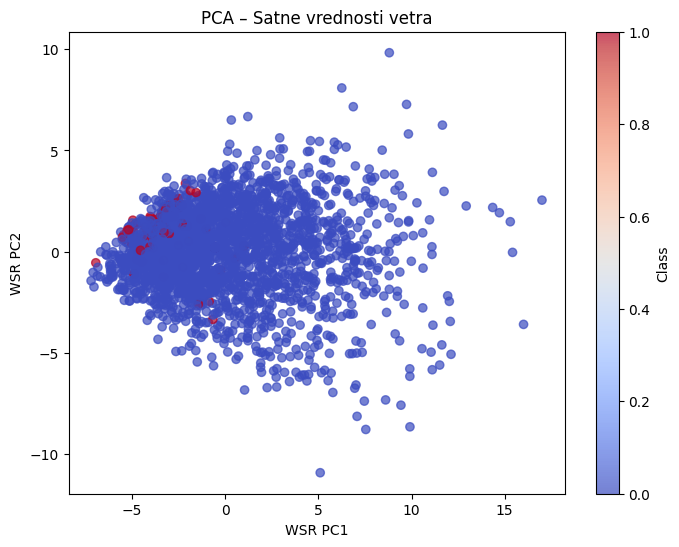

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(wsr_components[:,0], wsr_components[:,1], 
            c=data_scaled["Class"], cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Class")
plt.xlabel("WSR PC1")
plt.ylabel("WSR PC2")
plt.title("PCA – Satne vrednosti vetra")
plt.show()


Zakljucak za vetar: PC1 objasnjava 52.95% varijanse, PC2 17.53 varijanse -> ukupno oko 70%. Ovo ukazuje na haoticnu prirodu kretanja i same brzine vetra.

PCA za T0-T23(temperaturu)

In [35]:
pca_temp = PCA(n_components=1)
temp_components = pca_temp.fit_transform(data_scaled[temp_cols])

print("Temp PCA explained variance:", pca_temp.explained_variance_ratio_)


data_scaled["TEMP_PC1"] = temp_components[:, 0]


Temp PCA explained variance: [0.89462842]


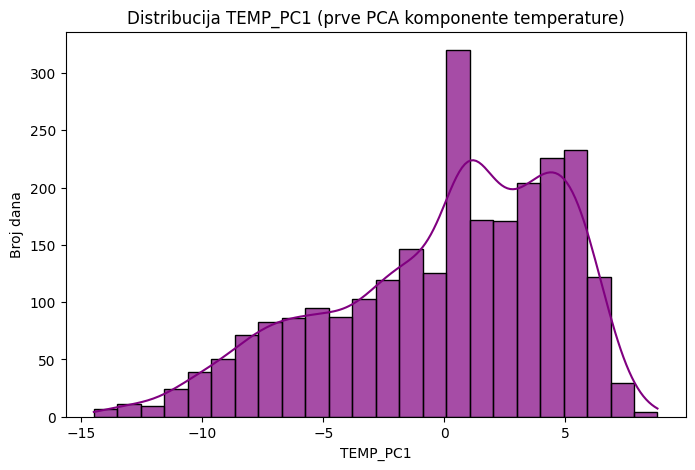

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(data_scaled["TEMP_PC1"], kde=True, color="purple", alpha=0.7)
plt.title("Distribucija TEMP_PC1 (prve PCA komponente temperature)")
plt.xlabel("TEMP_PC1")
plt.ylabel("Broj dana")
plt.show()


Zakljucak za temperaturu: PC1 = 89.46%, sto nam je vec dovoljno. Temperatura tokom dana se menja koordinisano, tako da je jedna komponentna dovoljna da objasni celu prirodu toka temperature kroz dan.

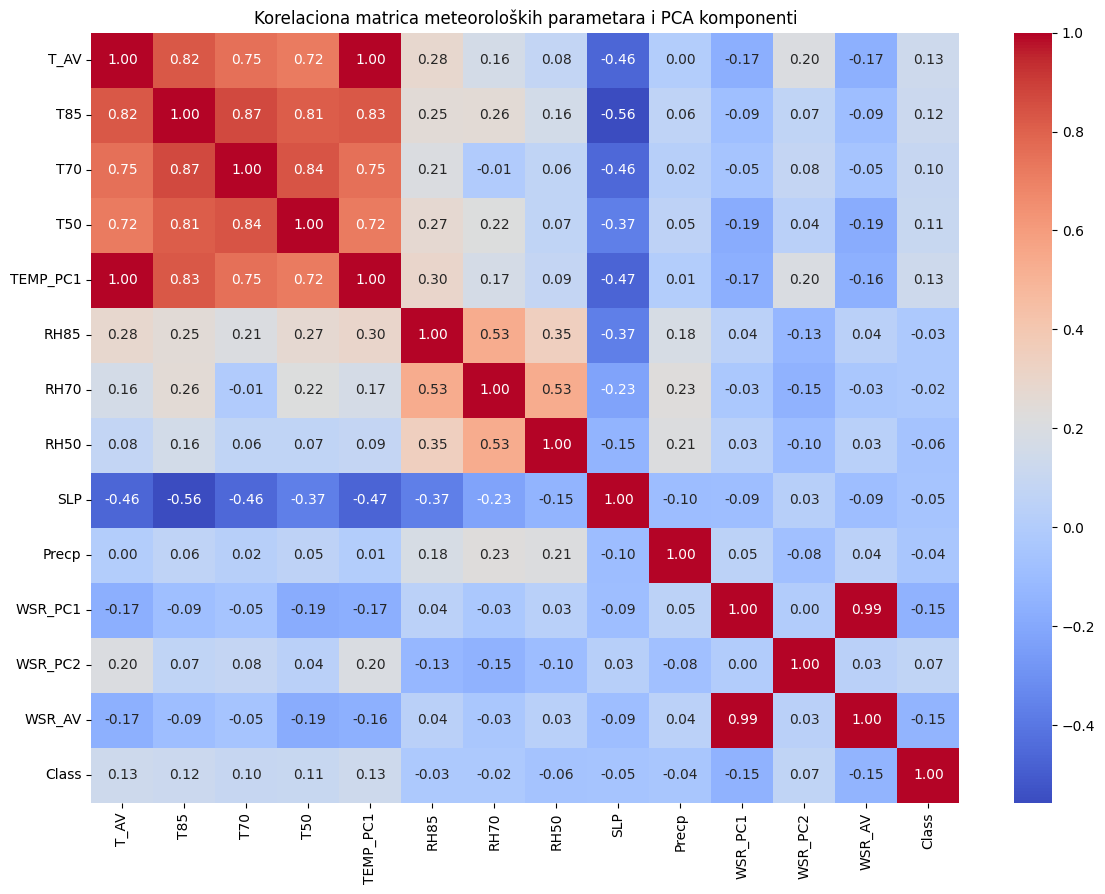

In [41]:
corr_cols = [
    # Temperature
    "T_AV", "T85", "T70", "T50", "TEMP_PC1",

    # Vlažnost
    "RH85", "RH70", "RH50",

    # Pritisak / padavine
    "SLP", "Precp",

    # Vetar PCA
    "WSR_PC1", "WSR_PC2",

    # Agregat vetra
    "WSR_AV",

    # Target
    "Class"
]

plt.figure(figsize=(14,10))
sns.heatmap(data_scaled[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelaciona matrica meteoroloških parametara i PCA komponenti")
plt.show()


Gledamo da li prati normalnu distribuciju kolone poput temperature, brzine vetra, vlaznosti vazduha.

In [43]:
from scipy.stats import shapiro

cols_to_test = ["TEMP_PC1", "T_AV", "WSR_PC1", "WSR_AV", "RH85", "SLP"]

for col in cols_to_test:
    stat, p = shapiro(data_scaled[col].dropna())
    print(f"{col}: p-value = {p:.5f}")


TEMP_PC1: p-value = 0.00000
T_AV: p-value = 0.00000
WSR_PC1: p-value = 0.00000
WSR_AV: p-value = 0.00000
RH85: p-value = 0.00000
SLP: p-value = 0.00000


Ne prati normalnu distribuciju, pa radimo Mann-Whitney U-test.

In [44]:
from scipy.stats import mannwhitneyu

tests = {
    "TEMP_PC1": "Temperatura (PCA)",
    "WSR_PC1": "Vetar (PCA)",
    "RH85": "Vlažnost",
    "SLP": "Pritisak"
}

class0 = data_scaled[data_scaled["Class"] == 0]
class1 = data_scaled[data_scaled["Class"] == 1]

for col, label in tests.items():
    stat, p = mannwhitneyu(class0[col], class1[col], alternative='two-sided')
    print(f"{label} - {col}: p-value = {p:.5f}")


Temperatura (PCA) - TEMP_PC1: p-value = 0.00000
Vetar (PCA) - WSR_PC1: p-value = 0.00000
Vlažnost - RH85: p-value = 0.06839
Pritisak - SLP: p-value = 0.01768


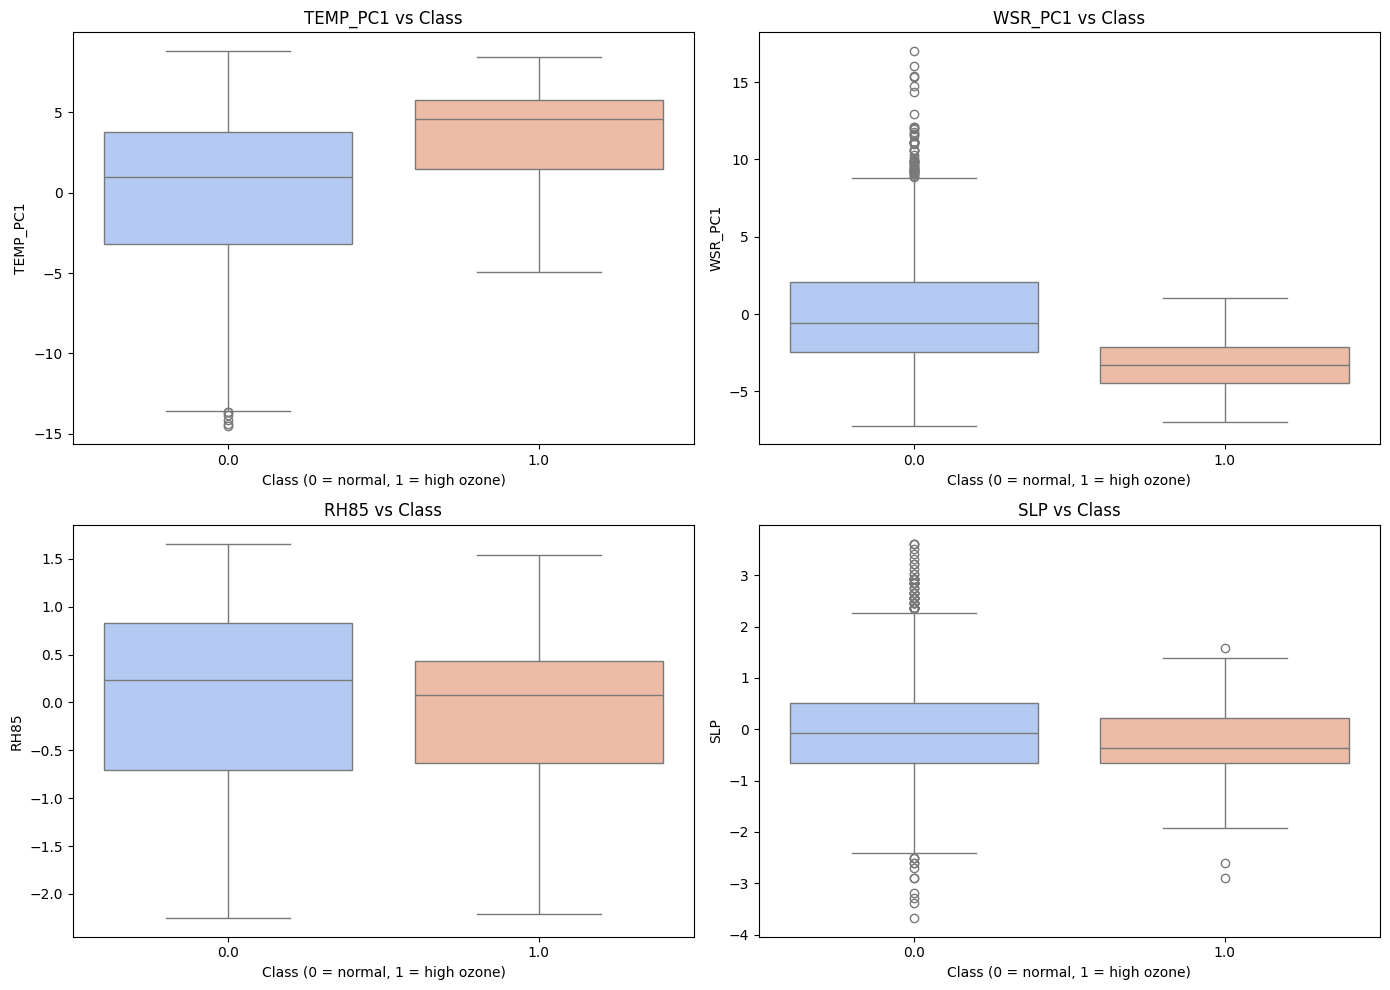

In [46]:
plt.figure(figsize=(14, 10))

# 1. TEMP_PC1
plt.subplot(2, 2, 1)
sns.boxplot(
    x="Class",
    y="TEMP_PC1",
    data=data_scaled,
    hue="Class",
    palette="coolwarm",
    dodge=False
)
plt.title("TEMP_PC1 vs Class")
plt.xlabel("Class (0 = normal, 1 = high ozone)")
plt.ylabel("TEMP_PC1")
plt.legend([],[], frameon=False)  # remove redundant legend

# 2. WSR_PC1
plt.subplot(2, 2, 2)
sns.boxplot(
    x="Class",
    y="WSR_PC1",
    data=data_scaled,
    hue="Class",
    palette="coolwarm",
    dodge=False
)
plt.title("WSR_PC1 vs Class")
plt.xlabel("Class (0 = normal, 1 = high ozone)")
plt.ylabel("WSR_PC1")
plt.legend([],[], frameon=False)

# 3. RH85
plt.subplot(2, 2, 3)
sns.boxplot(
    x="Class",
    y="RH85",
    data=data_scaled,
    hue="Class",
    palette="coolwarm",
    dodge=False
)
plt.title("RH85 vs Class")
plt.xlabel("Class (0 = normal, 1 = high ozone)")
plt.ylabel("RH85")
plt.legend([],[], frameon=False)

# 4. SLP
plt.subplot(2, 2, 4)
sns.boxplot(
    x="Class",
    y="SLP",
    data=data_scaled,
    hue="Class",
    palette="coolwarm",
    dodge=False
)
plt.title("SLP vs Class")
plt.xlabel("Class (0 = normal, 1 = high ozone)")
plt.ylabel("SLP")
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


Vidimo da na ozon utice: povisena temperatura, slabiji vetar, dok vlaga utice znatno manje, ako uopste.